# Практическое задание №3 "Классификация. Логистическая регрессия".

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Признаковое пространство, 4 признака
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
# Целевая переменная
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X.shape, y.shape

((4, 10), (10,))

In [4]:
# Стандартизация данных
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [6]:
# Вычисление потерь
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [7]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [8]:
# Функция активации
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

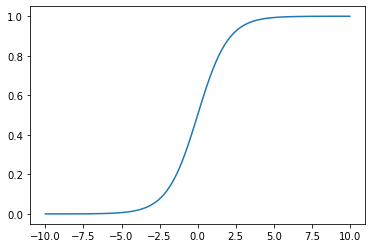

In [9]:
z = np.linspace(-10, 10, 101)
probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [10]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [11]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442177
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.553273778823678


## Задание №1

In [12]:
# Вычисление потерь
def calc_logloss(y, y_pred):
    # Как вариант: считаем, что логарифм в нуле это -inf или 1e100
#     safe_log = lambda x: np.nan_to_num(-np.inf) if x==0 else np.log(x)
    safe_log = lambda x: 1e100 if x==0 else np.log(x)
    vsafe_log = np.vectorize(safe_log)
    err = - np.mean(y * vsafe_log(y_pred) + (1.0 - y) * vsafe_log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [13]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.0, 0.7])
calc_logloss(y1, y_pred1)

-5e+99

## Задание №2

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    error_list = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        error_list.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    print(f"Iters: {iterations}, Alpha: {alpha}, Error: {error_list[-1]}, W: {W}")
            
    return W, error_list

Iters: 5000, Alpha: 5, Error: 0.0804889539724937, W: [-53.7606116   -5.12246517 -14.78397412  43.67370782]
Iters: 5000, Alpha: 1.0, Error: 0.1438003796511716, W: [-24.54827215  -2.59620081  -6.47193588  20.33039091]
Iters: 5000, Alpha: 0.1, Error: 0.2698091230218947, W: [-7.45498358 -1.13935179 -1.38026181  6.55264038]
Iters: 5000, Alpha: 0.01, Error: 0.41818207186671463, W: [-1.33877824 -0.91225125  0.82169045  2.38341031]
Iters: 5000, Alpha: 0.001, Error: 0.491009738609497, W: [ 0.04044622 -0.72055218  0.85793303  1.32690312]
Iters: 5000, Alpha: 0.0001, Error: 0.553273778823678, W: [ 0.36249064 -0.61234585  0.63568321  1.33183158]
Iters: 5000, Alpha: 1e-05, Error: 1.055758230052698, W: [ 0.47822191 -0.20918125  0.6460595   1.49531539]


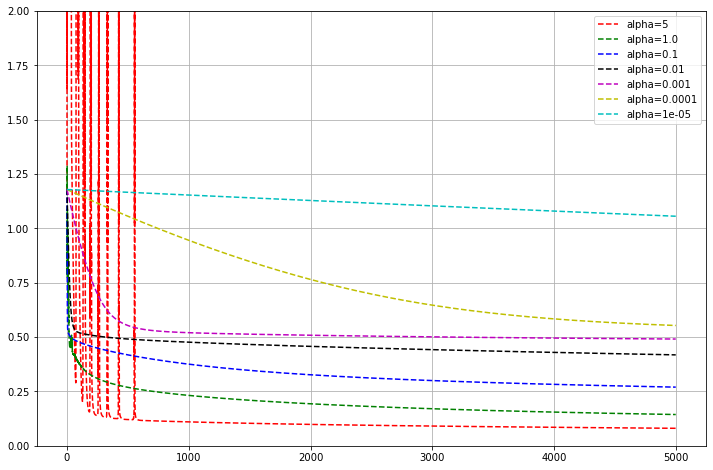

In [15]:
iterations = [5000]
alphas = [5, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
plt.figure(figsize = (12, 8))
s = ['r', 'g', 'b', 'k', 'm', 'y', 'c']
for m, alpha in zip(s, alphas):
    # Перезапуски (смена начальной точки, нулевых весов)
    for it in iterations:
        W, err_list = eval_model(X_st, y, it, alpha)
        label = f"alpha={alpha}"
        plt.plot(err_list, '--'+m, label=label)
plt.legend()
plt.grid()
plt.ylim([0,2])
plt.show()

Если отрисовывать графики с одинаковым $alpha$, то они будут просто сливаться, а мы будем видеть только график с большим количеством итераций. 

## Задание №3

In [16]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(W, X))
    return y_pred_proba

In [17]:
# Пример применения
alpha = 0.01
n_iter = 15350
W, err_l = eval_model(X_st, y, n_iter, alpha)
y_pred_proba = calc_pred_proba(W, X)
y_pred_proba

Iters: 15350, Alpha: 0.01, Error: 0.34517730046753664, W: [-3.53760413 -0.96259009  0.0054379   3.7760552 ]


array([0.88025142, 0.95616065, 0.99790845, 0.21219302, 0.99987804,
       0.98993699, 0.9999854 , 0.9998815 , 0.84850431, 0.99946206])

## Задание №4

In [18]:
def calc_pred(W, X, threshold):
    m = X.shape[1]
    y_pred = np.zeros(m)
    A = sigmoid(np.dot(W, X))
    for i in range(A.shape[0]):
        if A[i] > threshold:
            y_pred[i] = 1
        elif A[i] <= threshold:
            y_pred[i] = 0
    
    return y_pred

In [19]:
# Пример применения
alpha = 0.01
n_iter = 15350
th = 0.99
W, err_l = eval_model(X_st, y, n_iter, alpha)
y_pred = calc_pred(W, X, th)
y_pred

Iters: 15350, Alpha: 0.01, Error: 0.34517730046753664, W: [-3.53760413 -0.96259009  0.0054379   3.7760552 ]


array([0., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

## Задание №5

In [20]:
def quality_control(y_valid, y_pred):
    TP = ((y_pred == 1) & (y == 1)).sum()
    FP = ((y_pred == 1) & (y == 0)).sum()
    FN = ((y_pred == 0) & (y == 1)).sum()
    TN = ((y_pred == 0) & (y == 0)).sum()
    acc = (TP+TN)/(TP+FP+FN+TN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = 2*precision*recall/(precision+recall)
    print(f"Accuracy: {acc}")
    print(f"Confusion matrix: \n\t{TP}\t{FP}\n\t{FN}\t{TN}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 score: {f1}")

Зададим обученную модель и предсказания:

In [21]:
alpha = 0.01
n_iter = 15350
th = 0.99
W, err_l = eval_model(X_st, y, n_iter, alpha)
y_pred = calc_pred(W, X, th)

Iters: 15350, Alpha: 0.01, Error: 0.34517730046753664, W: [-3.53760413 -0.96259009  0.0054379   3.7760552 ]


Проведем оценку:

In [22]:
quality_control(y, y_pred)

Accuracy: 0.8
Confusion matrix: 
	4	1
	1	4
Precision: 0.8
Recall: 0.8
F1 score: 0.8000000000000002


## Задание №6

В теории переобучение, наверное,возможно, т.к. мы не имеем тестовой выборки, а располагаем только маленькой тренировочной. Данных очень мало. Слишком маленькая тестовая выборка не будет обеспечивать должной точности оценки качества обучения, а слишком маленькая обучающая выборка приведёт к снижению качества обучения.

Одним из знаков, что произошло переобучение модели, или мерой сложности считается получение больших по модулю весов при признаках. В наших моделях веса небольшие как я понимаю, поэтому переобучения нет.

Наверное, можно сделать вывод, что имея небольшое количество признаков, небольшое количество объектов и используя стандартизацию, вероятность переобучения модели невысокая.

---